## Disclaimer 

Cette correction est un exemple de correction. Elle n'est pas parfaite et peut comporter des erreurs (si oui, merci de me le signaler). 

In [2]:
# On se donne deux commandes pour importer numpy&matplotlib et avoir les graphiques "inline"
from pylab import *     
%matplotlib inline

# Exercice 1. Simulation et stabilité

Dans cet exercice, on s'intéresse à simuler le comportement d'un serveur de calcul. On utilise pour cela un modèle simplifié en temps discret. 

Le serveur reçoit des tâches de calcul à effectuer. On suppose que la durée d'exécution d'une tâche est constante, égale à une unité de temps. Si plusieurs tâches arrivent en même temps, le serveur les stocke dans une file d'attente. 

On note $A_t$ le nombre de tâches arrivant à l'instant $t$ et $X_t$ le nombre de tâches en attente à l'instant $t$. 

**Question 1** -- écrire une formule de récurrence liant $X_{t+1}$, $X_t$ et $A_t$. 

Le nombre de tâches en attente à l'instant $t+1$ est égale au nombre de tâches en attente à l'instant $t$ plus le nombre de tâches arrivées moins le nombre de tâche traitées. Cela donne: 
$$X_{t+1} = max(0,X_t + A_t -1)$$

**Question 2** -- On veut observer comment évolue le nombre de tâches en attente au cours du temps. Pour cela, on suppose que le nombre d'arrivées $A_t$ est distribué selon une loi de Poisson de paramètre $\rho$.  Compléter le code à trou suivant et tracer comment évolue le nombre de tâches en attente au cours du temps pour $\rho=0.5$ et $\rho=2$. Qu'observez vous? 

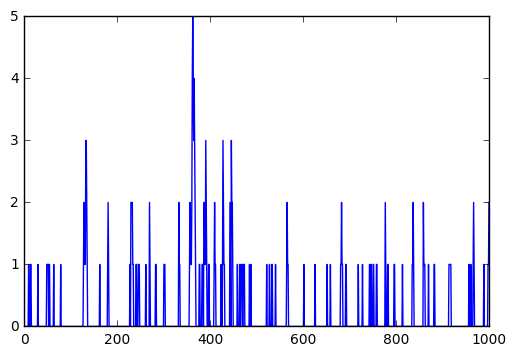

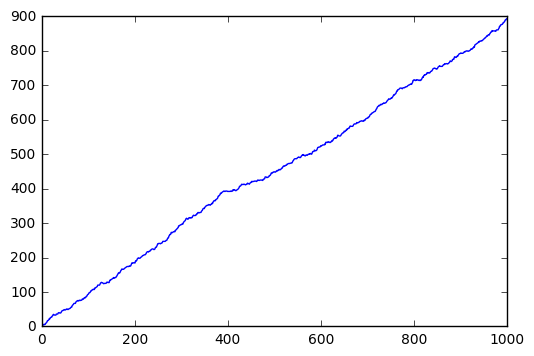

In [3]:
def simu_serveur(rho,T):
    X = [0]*T;
    for t in range(T-1):
        arrival = poisson(rho);
        X[t+1] = max(0,X[t]+arrival-1);
    return(X)
plot(simu_serveur( rho=0.5, T=1000))
figure();
plot(simu_serveur(rho=2,T=1000))

On observe que le système semble stable pour $\rho=0.5$ et instable pour $\rho=2$. 

On dit qu'un système est stable si le nombre de tâches ne tend pas vers l'infini. En terme mathématiques, cela veut dire que $\liminf_{t\to\infty} X_t < \infty$ (pour chaque trajectoire). 

**Question 3** (Stabilité). Pour quelles valeurs de $\rho$ votre serveur est-il stable? 

Nous avons vu que $\rho=0.5$ semble stable alors que $\rho=2$ semble instable. Pour tester la stabilité, nous allons tester différentes valeurs de $\rho$:

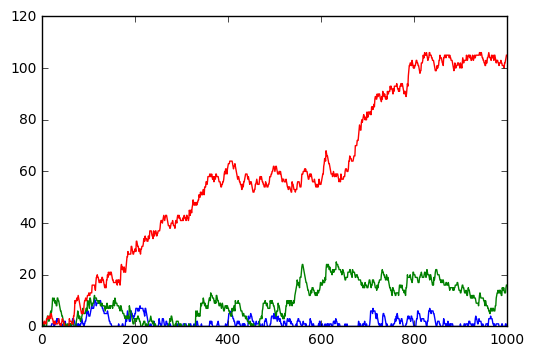

In [4]:
plot(simu_serveur( rho=0.9, T=1000))
plot(simu_serveur( rho=1, T=1000))
plot(simu_serveur( rho=1.1, T=1000))

En se rapprochant de $\rho=1$, on observe que le nombre de tâches en attente semble tendre vers l'infini pour $\rho=1.1$ mais pas pour $\rho\le1$. Nous verrons dans la suite du cours que $\rho=1$ est une valeur critique: cela correspond au cas où le nombre moyen d'arrivées par unité de temps est égal au nombre moyen de client servis par unité de temps. 

# Exercice 2. Le protocole Aloha

Le protocole Aloha est le premier protocole à accès multiple. Il a été mis en place pour un réseau de communication radio sur les îles Hawai. L'objectif est de partager une fréquence unique pour toutes les communications. Lors de l'utilisation d'Aloha, les ingénieurs ont été confrontés à des problèmes : pendant une assez longue période, le système marchait bien mais au bout d'un certain temps, le nombre de paquets en attente se mettait à tendre vers l'infini. Le système était alors remis à zéro manuellement. Rejetant le problème sur une faute matérielle, il a fallu plus de $10$ ans pour que l’on apporte une réponse satisfaisante. Dans cet exercice, nous allons écrire un simulateur pour mieux étudier ce phénomène. 


Dans ce protocole, toutes les stations sont autorisées à émettre un paquet à tout moment. Si, deux stations émettent en même temps, il y a une collision et le paquet doit être retransmis. Afin d'éviter une nouvelle collision, une station qui vient de subir une collision attend un temps aléatoire avant de retransmettre son paquet. 

On modèle ce protocole par un système en temps discret. On note $X_t$ le nombre de stations ayant un paquet à retransmettre à l'instant $t$.  
- A l'instant $t$, $A_t$ nouvelles stations arrivent avec chacune $1$ paquet à transmettre. Toutes ces stations essaient d'émettre leur paquet.
- Si deux stations (ou plus) essaient d'émettre en même temps, les deux paquets sont perdus et les stations devront ré-essayer dans le futur. 
- A chaque instant, toute station qui a un paquet a retransmettre décide d'émettre son paquet avec probabilité $p\in(0,1)$ et ce, jusqu'à ce que le paquet soit transmis avec succès. 

**Question 4** Exprimer en fonction de $X_t$ et de $A_t$ la probabilité qu'il y ait une transmission réussie (justifier). 

Il y a une transmission réussie s'il y a exactement une station qui essaie transmettre. Cela peut se produire s'il y a 
* aucune arrivée et exactement une station en attente qui essaie de transmettre
* une arrivée et aucune autre station qui essaie de transmettre

On a donc: 
$$ P(transmission~reussie) = \left\{\begin{array}{ll}
np(1-p)^{n-1} &si~A_t=0\\
(1-p)^n&si~A_t=1\\
0&sinon
\end{array}\right\}$$

**Question 5** Compléter le code à trou suivant. 

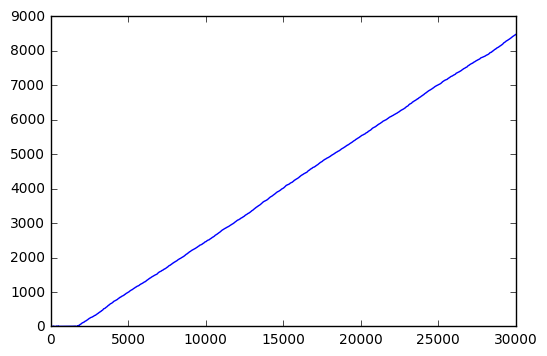

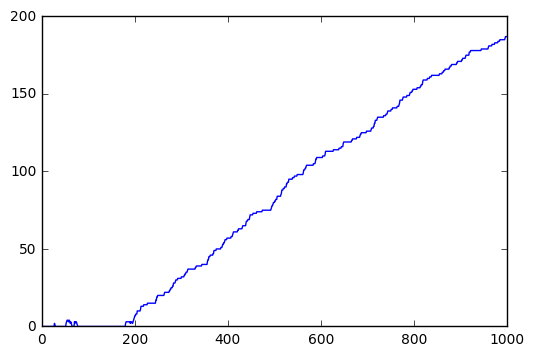

In [9]:
def aloha(rho,T,p):
    X = [0]*T;
    n = 0;
    for t in range(T-1):
        n = X[t]
        arrival = poisson(rho);
        transmission_proba = n*p*(1-p)**(n-1) if arrival==0 else (1-p)**n if arrival==1 else 0;
        departure = 1 if rand()<=transmission_proba else 0;
        X[t+1] = X[t]+arrival-departure
    return(X)
figure(); plot(aloha(.3,30000,.1))
figure(); plot(aloha(.2,1000,.5))

**Question 6** (Stabilité) Tracer le nombre de paquets en attente pour différentes valeurs de $\rho$ et de $p$. Qu'observez vous? Pour quelles valeurs de $\rho$ et $p$ pensez vous que le système est stable? Donner un argument heuristique qui explique vos observations. 

En faisant varier les paramètres, on peut observer que le système semble instable pour toutes le valeurs de $\rho$ et $p$ (à part $\rho=0$) bien sûr. Lorsque $\rho$ est petit, le système semble rester dans une région stable pendant un moment puis le nombre de stations se met à diverger vers l'infini. 

La raison pour ce phénomène est que la probabilité de transmission tend vers 0 lors que $X[t]$ tend vers l'infini. Ainsi, si par malchance il y a beaucoup d'arrivée à un instant donné, la probabilité d'avoir une tranmission réussie sera plus petite que le nombre moyen d'arrivée de client dans le système. 

# Exercice 3 : Aloha avec abandons 

Dans l'exercice précédent, on a supposé que les stations réessaient de transmettre leur paquet jusqu'à réussir. On considère le même protocole mais on suppose maintenant que les stations abandonnent au bout de $K$ essais. 

## Abandons aléatoires

On suppose que le nombre d'essais que chaque station s'autorise est un nombre aléatoire $K$ qui est distribué selon une loi géométrique de paramètre $q$. Autrement dit, à chaque fois qu'une station fait une tentative infructueuse, elle s'autorise à continuer avec probabilité $q$ et quitte le système avec probabilité $1-q$.

**Question 7** Exprimer la loi du nombre d'abandons à l'instant $t$, en fonction de $X_t$ et $q$.  

Le nombre de stations qui essaient de transmettre est égal à $T_t = A_t+B(X_t,p)$ où $B(n,p)$ est une variable tirée selon une loi binomiale. Le nombre de stations qui abandonnent est égal à 0 si $T_t\le1$ et égal à $B(T_t,q)$ si $T_t\ge2$ (où à nouveau $B(T_t,q)$ est une variable binomiale indépendante de la précédente. 

**Question 8** On fixe $q=1/2$ et $p=0.1$. Compléter le code ci dessous. 
* Que pensez vous de la stabilité du système?
* Tracer en fonction de $\rho$ le nombre moyen de paquets transmis avec succès (par unité de temps). Qu'observez vous? 


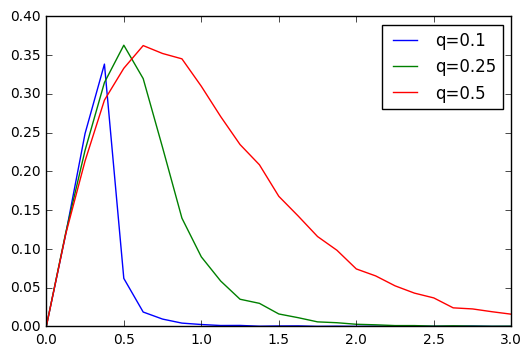

In [83]:
def aloha_abandon(rho,T,p,q):
    X = [0]*T;
    success = 0; 
    for t in range(T-1):
        arrival = poisson(rho);
        nombre_de_tranmissions = arrival + binomial(X[t],p);
        departure = 1 if nombre_de_tranmissions ==1 else 0;
        abandon = binomial(nombre_de_tranmissions,q) if nombre_de_tranmissions>=2 else 0;
        X[t+1] = X[t]+arrival-departure-abandon
        success += departure;
    return(success/T)

for q in [.1,.25,.5]:
    myRho = linspace(0,3,25);
    throughput = zeros(len(myRho));
    for j,rho in enumerate(myRho):
        throughput[j]=aloha_abandon(rho,10000,.1, q)
    plot(myRho,throughput)
legend(('q=0.1','q=0.25','q=0.5'))

Les client abandonnant, on s'attend à ce que le système soit stable (lorsqu'il y a beaucoup de client dans le système, il y a beaucoup d'abandons). 

En traçant le nombre de paquets transmis avec succès en fonction de $\rho$, on observe un phénomène de "congestion collapse": lorsque $\rho$ est petit, augmenter $\rho$ conduit à plus de paquets transmis. Passé une certaine valeur (qui dépend de $q$), augmenter $\rho$ introduit plus de congestion dans le système et donc plus de collisions. 

## Abandons déterministes

On suppose maintenant que chaque station s'autorise au plus $K = \lfloor 1/q \rfloor$ retransmissions. 

**Question 9** Peut-on facilement adapter le code du simulateur ci dessus? 

**Question 10** Écrire un simulateur a événements discrets et reprendre la question 8. Qu'observez vous? 

La principale difficulté pour adapter le simulateur ci dessus est de se souvenir du nombre de retransmission que chaque station s'autorise. Pour cela, il faut utiliser un état supplémentaire. 

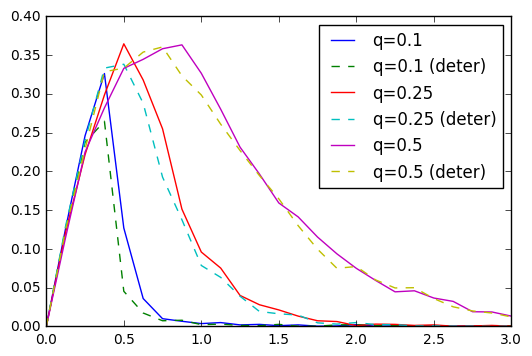

In [84]:
def aloha_abandon_deter(rho,T,p,q):
    X = [0]*T;
    retransmissions_restantes = list([]);
    success = 0; 
    for t in range(T-1):
        arrival = poisson(rho); # le nombre d'arrives
        qui_tente_de_transmettre = array([rand()<=p for i in range(X[t])]); 
        # un vecteur de bool où qui_tente_de_transmettre[i]==true si la ième station émet. 
        
        if arrival + sum(array(qui_tente_de_transmettre)) == 1:
            # une station a réussi à transmettre
            departure = 1
            if arrival != 1:
                # Si c'est la station qui vient d'arriver, cela ne change rien
                # Si c'est une station existante, il faut l'enlever de la liste
                retransmissions_restantes.pop(where(qui_tente_de_transmettre)[0][0]);
        else:
            # personne n'a réussi
            departure = 0
            for i in range(arrival):
                # on ajoute les nouveaux venus
                retransmissions_restantes.append(int(1/q)-1);
            for i in where(qui_tente_de_transmettre)[0]:
                # on décrémente de "1" le compteur des anciennes stations qui ont essayé de transmettre
                retransmissions_restantes[i] -= 1;
        i=0; abandon=0;
        while(i<len(retransmissions_restantes)):
            if retransmissions_restantes[i]==0:
                retransmissions_restantes.pop(i);
                abandon += 1;
            else:
                i+=1;
        X[t+1] = X[t]+arrival-departure-abandon
        success += departure;
    return(success/T)

for q in [.1,.25,.5]:
    myRho = linspace(0,3,25);
    throughput = zeros(len(myRho));
    throughput_deter = zeros(len(myRho));
    for j,rho in enumerate(myRho):
        throughput[j]=aloha_abandon(rho,3000,.1, q)
        throughput_deter[j]=aloha_abandon_deter(rho,3000,.1, q)
    plot(myRho,throughput)
    plot(myRho,throughput_deter,'--')
legend(('q=0.1','q=0.1 (deter)','q=0.25','q=0.25 (deter)','q=0.5','q=0.5 (deter)'))

En résumé: on observe essentiellement le même comportement avec des abandons déterministes et aléatoires. 